In [43]:
import pandas as pd

In [44]:
train_df6 =pd.read_csv("train.csv", header=0)
test_df6 =pd.read_csv("test.csv", header=0)
test_df6.tail()

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
413,1,0.377084,0,0,8.0500,0,0,1,0,0,1
414,0,0.486409,0,0,108.9000,1,0,0,1,0,0
415,1,0.480145,0,0,7.2500,0,0,1,0,0,1
416,1,0.377084,0,0,8.0500,0,0,1,0,0,1
417,1,0.377084,1,1,22.3583,0,0,1,1,0,0


In [50]:
# 学習データと評価データに分ける
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

def split_valid_test_data(data, fraction=(0.2)):
    #目的変数を抽出
    data_y = data["Survived"]
    lb = LabelBinarizer()
    data_y = lb.fit_transform(data_y)#arrayにしている
    
    #目的変数を消す
    data_x = data.drop(["Survived"], axis=1)
    
    #pandasで分ける
    train_x, valid_x, train_y, valid_y = train_test_split(data_x, data_y, test_size=fraction)

    return train_x.values, train_y, valid_x.values, valid_y

train_x, train_y, valid_x, valid_y = split_valid_test_data(train_df6)
print("train_x:{}".format(train_x.shape))
print("train_y:{}".format(train_y.shape))
print("valid_x:{}".format(valid_x.shape))
print("valid_y:{}".format(valid_y.shape))
train_y = train_y.T[0]
valid_y = valid_y.T[0]

train_x:(712, 11)
train_y:(712, 1)
valid_x:(179, 11)
valid_y:(179, 1)


In [52]:
from sklearn import tree
clf_class = tree.DecisionTreeClassifier(max_depth=3, random_state=2)
clf_class.fit(train_x, train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2,
            splitter='best')

In [53]:
pred_train = clf_class.predict(train_x)
pred_valid = clf_class.predict(valid_x)
train_score = sum(pred_train== train_y)/len(train_y)
valid_score  = sum(pred_valid== valid_y)/len(valid_y)

train_score,valid_score

(0.8342696629213483, 0.8156424581005587)

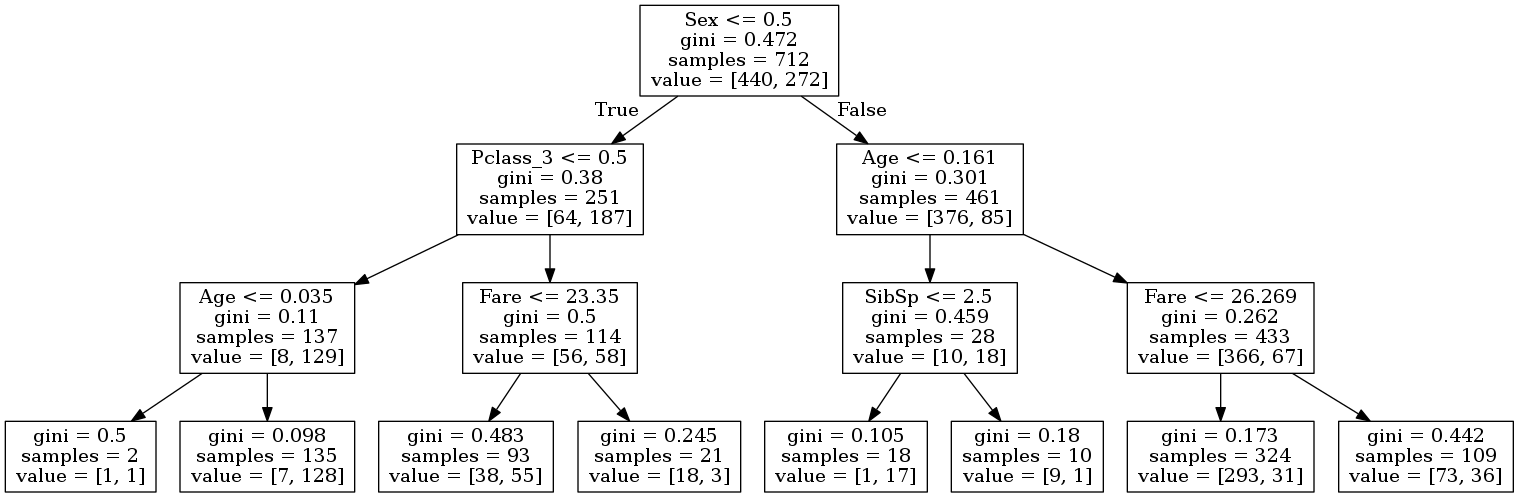

In [56]:
#可視化
import pydotplus
from IPython.display import Image
from graphviz import Digraph
from sklearn.externals.six import StringIO

dot_data = StringIO()
tree.export_graphviz(clf_class, out_file=dot_data,feature_names=test_df6.columns, max_depth=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("graph.pdf")
Image(graph.create_png())

In [54]:
pred_valid = clf_class.predict(test_df6.values)
pred_valid

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
submission =pd.read_csv("id.csv", header=0)
submission["Survived"] = pred_valid
submission.to_csv("submission_tree.csv",index=False)
submission.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0
